In [1]:
# 1.Preparing Data

import pandas as pd

In [2]:
import numpy as np

In [3]:
sheet_1 = pd.read_csv("附件1.csv",encoding='gb18030')

/Users/duli/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
sheet_2 = pd.read_csv("附件2.csv",encoding='gb18030')

/Users/duli/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
excel3 = pd.ExcelFile('附件3.xlsx')
sheet_3 = pd.read_excel(excel3)

excel4 = pd.ExcelFile('附件4.xlsx')
sheet_4 = pd.read_excel(excel4)

# Q1

### Sheet 1

In [7]:
import time

In [8]:
sheet_1['create_dt'] = sheet_1['create_dt'].astype('datetime64')

In [9]:
Q1_start_time = np.datetime64('2016-11-30')

In [10]:
Q1_end_time = np.datetime64('2019-01-02')

In [11]:
sheet_2['create_dt'] = sheet_2['create_dt'].astype('datetime64')

In [12]:
Sales_dic = {}

In [13]:
Profit_rate_dic = {}

In [14]:
def process_sheet1(Q1_start_time):
    time_revised_sheet_1 = sheet_1[(sheet_1['create_dt']==Q1_start_time)]
    vaild_data_Sheet1 = time_revised_sheet_1[time_revised_sheet_1["is_finished"] == 1]
    Q1_sheet1 = vaild_data_Sheet1[['sku_cnt','sku_prc','sku_sale_prc','sku_cost_prc','upc_code']]
    Q1_sheet1['upc_code'] = Q1_sheet1.apply(lambda x:x['sku_cnt']*x['sku_sale_prc'],axis=1)
    Q1_sheet_1_sales = Q1_sheet1['upc_code'].sum()
    promotion_profit_sheet1 = 0
    Q1_sheet1 = vaild_data_Sheet1[['sku_cnt','sku_prc','sku_sale_prc','sku_cost_prc','upc_code']]
    Q1_sheet1['upc_code'] = Q1_sheet1.apply(lambda x:x['sku_sale_prc']-x['sku_sale_prc']/1.3,axis=1)
    non_promotion_profit_sheet1 = Q1_sheet1['upc_code'].sum()                                                                                    
    Q1_sheet1 = vaild_data_Sheet1[['sku_cnt','sku_prc','sku_sale_prc','sku_cost_prc','upc_code']]
    promotion_cost_sheet1 = Q1_sheet1[Q1_sheet1['sku_cost_prc']!=0]['sku_cost_prc'].sum()
    Q1_sheet1['upc_code'] = Q1_sheet1.apply(lambda x:x['sku_sale_prc']/1.3,axis=1)
    non_promotion_cost_sheet1 = Q1_sheet1['upc_code'].sum()
    
    return promotion_profit_sheet1,non_promotion_profit_sheet1,promotion_cost_sheet1,non_promotion_cost_sheet1,Q1_sheet_1_sales

In [15]:
def process_sheet2(Q1_start_time):
    time_revised_sheet_2 = sheet_2[(sheet_2['create_dt']==Q1_start_time)]
    vaild_data_Sheet2 = time_revised_sheet_2[time_revised_sheet_2["is_finished"] == 1]
    Q1_sheet2 = vaild_data_Sheet2[['sku_cnt','sku_prc','sku_sale_prc','sku_cost_prc','upc_code']]
    Q1_sheet2['upc_code'] = Q1_sheet2.apply(lambda x:x['sku_cnt']*x['sku_sale_prc'],axis=1)
    Q1_sheet_2_sales = Q1_sheet2['upc_code'].sum()
    promotion_profit_sheet2 = 0
    Q1_sheet2 = vaild_data_Sheet2[['sku_cnt','sku_prc','sku_sale_prc','sku_cost_prc','upc_code']]
    Q1_sheet2['upc_code'] = Q1_sheet2.apply(lambda x:x['sku_sale_prc']-x['sku_sale_prc']/1.3,axis=1)
    non_promotion_profit_sheet2 = Q1_sheet2['upc_code'].sum()                                                                                    
    Q1_sheet2 = vaild_data_Sheet2[['sku_cnt','sku_prc','sku_sale_prc','sku_cost_prc','upc_code']]
    promotion_cost_sheet2 = Q1_sheet2[Q1_sheet2['sku_cost_prc']!=0]['sku_cost_prc'].sum()
    Q1_sheet2['upc_code'] = Q1_sheet2.apply(lambda x:x['sku_sale_prc']/1.3,axis=1)
    non_promotion_cost_sheet2 = Q1_sheet2['upc_code'].sum()
    
    
    return promotion_profit_sheet2,non_promotion_profit_sheet2,promotion_cost_sheet2,non_promotion_cost_sheet2,Q1_sheet_2_sales

In [16]:
while Q1_start_time<=Q1_end_time:
    if (sheet_1[(sheet_1['create_dt']==Q1_start_time)].empty)and(sheet_2[(sheet_2['create_dt']==Q1_start_time)].empty):
        Sales_dic[Q1_start_time] = (0)
        Profit_rate_dic[Q1_start_time] = (0)
        Q1_start_time = Q1_start_time + 1
        continue
    if not(sheet_1[(sheet_1['create_dt']==Q1_start_time)].empty):
        
        promotion_profit_sheet1,non_promotion_profit_sheet1,promotion_cost_sheet1,non_promotion_cost_sheet1,Q1_sheet_1_sales = process_sheet1(Q1_start_time)
    else:
        
        promotion_profit_sheet1 = 0
        non_promotion_profit_sheet1 = 0
        promotion_cost_sheet1 = 0
        non_promotion_cost_sheet1 = 0
        Q1_sheet_1_sales = 0

    if not(sheet_2[(sheet_2['create_dt']==Q1_start_time)].empty):
        promotion_profit_sheet2,non_promotion_profit_sheet2,promotion_cost_sheet2,non_promotion_cost_sheet2,Q1_sheet_2_sales = process_sheet2(Q1_start_time)
    else:
        promotion_profit_sheet2 = 0
        non_promotion_profit_sheet2 = 0
        promotion_cost_sheet2 = 0
        non_promotion_cost_sheet2 = 0
        Q1_sheet_2_sales = 0


        
    Q1_sales = Q1_sheet_1_sales + Q1_sheet_2_sales
    Q1_profit_rate = ((promotion_profit_sheet1+promotion_profit_sheet2+non_promotion_profit_sheet1+non_promotion_profit_sheet2)/(promotion_cost_sheet1+promotion_cost_sheet2+non_promotion_cost_sheet1+non_promotion_cost_sheet2))
    
    Sales_dic[Q1_start_time] = (Q1_sales)
    Profit_rate_dic[Q1_start_time] = (Q1_profit_rate) 
    
    Q1_start_time = Q1_start_time + 1
    
   

/Users/duli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/duli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/duli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

# Q2

## Pararmeters Calculation

In [17]:
import numpy as np
import pandas as pd

In [18]:
import time

In [19]:
sheet_1 = pd.read_csv("附件1.csv",encoding='gb18030')

/Users/duli/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
sheet_2 = pd.read_csv("附件2.csv",encoding='gb18030')

/Users/duli/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
excel3 = pd.ExcelFile('附件3.xlsx')
sheet_3 = pd.read_excel(excel3)

In [22]:
excel4 = pd.ExcelFile('附件4.xlsx')
sheet_4 = pd.read_excel(excel4)

In [23]:
sheet_1['create_dt'] = sheet_1['create_dt'].astype('datetime64')

In [24]:
sheet_2['create_dt'] = sheet_2['create_dt'].astype('datetime64')

In [25]:
sheet_1 = sheet_1[sheet_1['is_finished']==1]

In [26]:
sheet_2 = sheet_2[sheet_2['is_finished']==1]

In [27]:
RCDS_Weight = np.array([(1, 1/7, 1/5),(7, 1, 2),(5, 1/2, 1)])

In [96]:
W_ = {}
W_sum = 0
for i in range(RCDS_Weight.shape[0]):
    name_matrix = ['Wc_', 'Wd_', 'Ws_']
    temp = 1
    for j in range(RCDS_Weight.shape[1]):
        temp = RCDS_Weight[i, j]*temp
    W_[name_matrix[i]] = np.power(temp,1/3)
    W_sum += W_[name_matrix[i]]
    
    

In [29]:
for i in W_:
    W_[i] = round(W_[i]/W_sum,3)
    

In [97]:
W_

{'Wc_': 0.30571070873287987,
 'Wd_': 2.4101422641752297,
 'Ws_': 1.3572088082974532}

In [31]:
W_

{'Wc_': 0.075, 'Wd_': 0.592, 'Ws_': 0.333}

In [32]:
b = np.linalg.eigvals(RCDS_Weight)

In [33]:
lamb = b[0].real

In [34]:
lamb

3.014151882186208

In [35]:
CI = (lamb - 3)/2

In [36]:
CI

0.0070759410931040545

In [37]:
RCDS_Weight

array([[1.        , 0.14285714, 0.2       ],
       [7.        , 1.        , 2.        ],
       [5.        , 0.5       , 1.        ]])

In [38]:
RI = 0.58

In [39]:
CR = CI / RI

In [40]:
CR

0.012199898436386301

In [98]:
0.014/0.58

0.024137931034482762

## Implementation

In [41]:
a = sheet_3[np.logical_and((sheet_3['begin_time']<=np.datetime64('2017-09-02 23:59:59')),(sheet_3['end_time']>=np.datetime64('2017-09-02 00:00:00')))]

In [42]:
sheet_3_vaild = sheet_3[sheet_3['state']==5]

In [43]:
Q2_start_time = np.datetime64('2016-11-30 00:00:00')

In [44]:
Q2_days = np.datetime64('2016-11-30')

In [45]:
Q2_day_time = np.datetime64('2016-11-30 23:59:59')

In [46]:
Q2_end_time = np.datetime64('2019-01-02 23:59:59')

In [47]:
Discount_info_per_day = {}

In [48]:
while Q2_start_time<=Q2_end_time:
    
    a = sheet_3_vaild[np.logical_and((sheet_3_vaild['begin_time']<=Q2_day_time),(sheet_3_vaild['end_time']>=Q2_start_time))]
    Discount_info_per_day[Q2_days] = a
    
    Q2_start_time = Q2_start_time + 86400
    Q2_days = Q2_days + 1
    Q2_day_time = Q2_day_time + 86400

## After 2017-03-07

In [49]:
C_per_day = {}

In [50]:
S_per_day = {}

In [51]:
D_per_day ={}

In [52]:
Q2_end_time = np.datetime64('2019-01-02')

In [53]:
Q2_start_time = np.datetime64('2017-03-07')

In [54]:
sheet_1 = pd.concat([sheet_1,sheet_2])

In [55]:
while Q2_start_time<=Q2_end_time:
    Discount_record = sheet_1[sheet_1['create_dt']==Q2_start_time]
    test_Q2= pd.concat([Discount_record['sku_id'],Discount_info_per_day[Q2_start_time]['sku_id']])
    Class_of_goods = len(test_Q2.unique())
    C_per_day[Q2_start_time] = Class_of_goods
    Sales_count_sheet = Discount_record
    Sales_count = Discount_record['sku_cnt'].sum()
    S_per_day[Q2_start_time] = Sales_count
    Dis_info_board= Discount_info_per_day[Q2_start_time]
    Dis_info_un = Dis_info_board.groupby(['sku_id']).sum()
    Dis_info_un['id'] = (Dis_info_un['pdj_price']-Dis_info_un['promotion_price'])/Dis_info_un['pdj_price']
    Dis_rate_board = (Dis_info_un['id'].sum())/len(Dis_info_un)
    for i in range(len(Dis_info_un)):
        Discount_record = Discount_record[Discount_record['sku_id']!=Dis_info_un.index[1]]
    
    Discount_record_un = Discount_record.groupby(['sku_id']).sum()
    Discount_record_un['is_finished'] = (Discount_record_un['sku_prc'] - Discount_record_un['sku_sale_prc'])/Discount_record_un['sku_prc']
    if Discount_record_un['is_finished'].sum()!=0:
        Dis_rate_record = (Discount_record_un['is_finished'].sum())/len(Discount_record_un)
    else:
        Dis_rate_record = 0
    Dis_rate = (Dis_rate_board + Dis_rate_record)/2
    D_per_day[Q2_start_time] = Dis_rate
    
    Q2_start_time = Q2_start_time + 1
        
    

## Before 2017-03-07

In [56]:
Q2_end_time = np.datetime64('2017-03-06')

In [57]:
Q2_start_time = np.datetime64('2016-11-30')

In [58]:
while Q2_start_time<=Q2_end_time:
    Discount_record = sheet_1[sheet_1['create_dt']==Q2_start_time]
    No_of_Goods = len(Discount_record['sku_id'].unique())
    C_per_day[Q2_start_time] = No_of_Goods
    Sales_count_bef = Discount_record['sku_cnt'].sum()
    S_per_day[Q2_start_time] = Sales_count_bef
    Discount_un = Discount_record.groupby(['sku_id']).sum()
    Discount_un['is_finished'] = (Discount_un['sku_prc'] - Discount_un['sku_sale_prc'])/Discount_un['sku_prc']
    
    if Discount_un['is_finished'].sum()!=0:
        Dis_rate = (Discount_un['is_finished'].sum())/len(Discount_un)
    else:
        Dis_rate = 0

    D_per_day[Q2_start_time] = Dis_rate
    
    Q2_start_time = Q2_start_time + 1

In [59]:

start_time = np.datetime64('2016-11-30')
min_c = 10000
for i in range(len(C_per_day)):
    if (C_per_day[start_time]<min_c):
        min_c = C_per_day[start_time]
    start_time = start_time + 1


In [60]:

start_time = np.datetime64('2016-11-30')
max_c = 10
for i in range(len(C_per_day)):
    if (C_per_day[start_time]>max_c):
        max_c = C_per_day[start_time]
    start_time = start_time + 1


In [61]:
start_time = np.datetime64('2016-11-30')
min_s = 10000
for i in range(len(S_per_day)):
    if (S_per_day[start_time]<min_s):
        min_s = S_per_day[start_time]
    start_time = start_time + 1


In [62]:

start_time = np.datetime64('2016-11-30')
max_s = 10
for i in range(len(S_per_day)):
    if (S_per_day[start_time]>max_s):
        max_s = S_per_day[start_time]
    start_time = start_time + 1



In [63]:
start_time = np.datetime64('2016-11-30')
min_d = 10000
for i in range(len(D_per_day)):
    if (D_per_day[start_time]<min_d):
        min_d = D_per_day[start_time]
    start_time = start_time + 1



In [64]:

start_time = np.datetime64('2016-11-30')
max_d = 0.1
for i in range(len(D_per_day)):
    if (D_per_day[start_time]>max_d):
        max_d = D_per_day[start_time]
    start_time = start_time + 1



In [65]:
min_c

110

In [66]:
max_c

3056

In [67]:
min_d

0.029546289438748687

In [68]:
max_d

0.22859252190408413

In [69]:
min_s

0

In [70]:
max_s

19590

## Calculating the discount rate


In [71]:
value_c = {}
start_time = np.datetime64('2016-11-30')
for i in range(len(C_per_day)):
    value_c[start_time] = np.ceil(C_per_day[start_time]*5/(max_c-min_c))
    start_time = start_time + 1

In [72]:
value_d = {}
start_time = np.datetime64('2016-11-30')
for i in range(len(D_per_day)):
    value_d[start_time] = np.ceil((D_per_day[start_time]-min_d)*5/(max_d-min_d))
    start_time = start_time + 1

In [73]:
value_s = {}
start_time = np.datetime64('2016-11-30')
for i in range(len(S_per_day)):
    value_s[start_time] = np.ceil(S_per_day[start_time]*5/(max_s-min_s))
    start_time = start_time + 1

In [74]:
Value_dic = {}
start_time = np.datetime64('2016-11-30')

for i in range(len(value_c)):
    value_temp = value_c[start_time]*W_['Wc_']+value_d[start_time]*W_['Wd_']+value_s[start_time]*W_['Ws_']
    Value_dic[start_time] = value_temp
    
    start_time = start_time + 1
    

In [75]:
value_c_ = {}
start_time = np.datetime64('2016-11-30')
for i in range(len(C_per_day)):
    value_c_[start_time] = (C_per_day[start_time]/(max_c-min_c))
    start_time = start_time + 1

In [76]:
value_d_ = {}
start_time = np.datetime64('2016-11-30')
for i in range(len(D_per_day)):
    value_d_[start_time] = ((D_per_day[start_time]-min_d)/(max_d-min_d))
    start_time = start_time + 1

In [77]:
value_s_ = {}
start_time = np.datetime64('2016-11-30')
for i in range(len(S_per_day)):
    value_s_[start_time] = (S_per_day[start_time]/(max_s-min_s))
    start_time = start_time + 1

In [78]:
Value_dic_ = {}
start_time = np.datetime64('2016-11-30')

for i in range(len(value_c_)):
    value_temp = value_c_[start_time]*W_['Wc_']+value_d_[start_time]*W_['Wd_']+value_s_[start_time]*W_['Ws_']
    Value_dic_[start_time] = value_temp
    
    start_time = start_time + 1
    

In [79]:
import matplotlib.pyplot as plt

In [80]:
x = np.arange(0,len(Sales_dic))

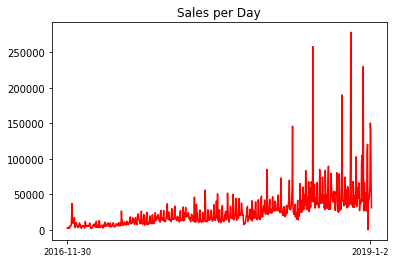

In [81]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(x,Sales_dic.values(),'r')
ax.set_title('Sales per Day')
ax.set_xticks([0,760])
ax.set_xticklabels(['2016-11-30','2019-1-2'],fontsize=    'small')
plt.savefig('4.jpg')
plt.show()

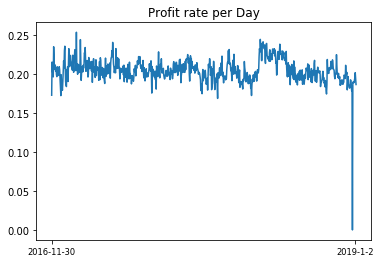

In [82]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(x,Profit_rate_dic.values())
ax.set_title('Profit rate per Day')
ax.set_xticks([0,760])
ax.set_xticklabels(['2016-11-30','2019-1-2'],fontsize=    'small')
plt.savefig('4.jpg')
plt.show()

In [83]:
a = Value_dic_.values()

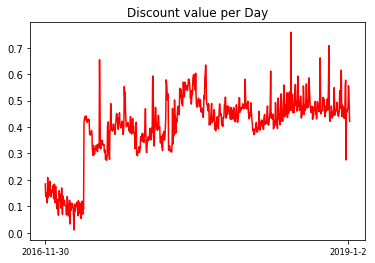

In [99]:
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(x,a,'r')
ax.set_title('Discount value per Day')
ax.set_xticks([0,760])
ax.set_xticklabels(['2016-11-30','2019-1-2'],fontsize=    'small')
plt.savefig('4.jpg')
plt.show()

In [85]:
Value_dic_[np.datetime64('2018-12-24')]

0.27547263510680464

In [86]:
value_c_[np.datetime64('2018-12-24')]

0.5773930753564155

In [87]:
value_d_[np.datetime64('2018-12-24')]

0.39217593657951605

In [88]:
value_s_[np.datetime64('2018-12-24')]

0.0

In [89]:
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 

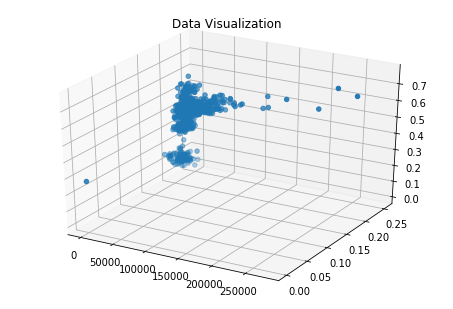

In [101]:
fig = plt.figure()
ax = Axes3D(fig)
#ax.view_init(270, 0)
ax.set_title('Data Visualization')


ax.scatter(list(Sales_dic.values()),list(Profit_rate_dic.values()),list(Value_dic_.values()))
plt.savefig('4.jpg')



In [91]:
import numpy as np
import tensorflow as tf
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 参数、迭代阈值
w1 = 0
w2 = 0
b = 0
threshold = 0.00001

/Users/duli/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/Users/duli/anaconda3/lib/python3.6/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.23) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


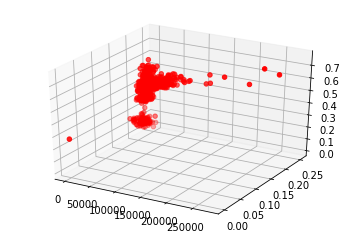

In [92]:
# 1.生成数据
# 这里需要强制转换成float32，否则后面在matmul时会提示float32和float64类型不匹配
# 这里的x_data包含x和y坐标
x_coor = np.float32(list(Sales_dic.values()))
y_coor = np.float32(list(Profit_rate_dic.values()))
x_data = np.float32(np.zeros([2, len(Sales_dic)]))


x_data[0, :] = np.float32(list(Sales_dic.values()))
x_data[1, :] = np.float32(list(Profit_rate_dic.values()))
y_data = np.dot([w1, w2], x_data) + b


y_data = np.float32(list(Value_dic_.values()))

ax = plt.figure().add_subplot(111, projection='3d')
ax.scatter(x_coor, y_coor, y_data, c='r', marker='o')

# 显示图像
plt.show()

In [93]:
# random_uniform用于返回一个指定大小，数值介于指定范围的矩阵
W = tf.Variable(tf.random_uniform([1, 2], -100, 100))
# 这里b的shape是(1,)，并不是1×1，第二维是任意大小，所以才能在下面和1×100的矩阵相加
b = tf.Variable(tf.zeros([1]))
y = tf.matmul(W, x_data) + b

# 3.定义评价指标
# 采用方差的定义，求取平均方差
loss = tf.reduce_mean(tf.square(y - y_data))

# 4.构造运行图
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# 5.启动图
init = tf.global_variables_initializer()
sess = tf.Session()
# 运行之前必须要先运行这行代码，进行初始化
sess.run(init)

t1 = time.time()

count = 0
while sess.run(loss) > threshold:
    sess.run(train)
    count += 1
    # 注意，直接打印loss并不是它的内容，必须sess.run(loss)打印出来的才是它的数值
    # 因为我们在建立graph的时候，只建立tensor的结构形状信息，并没有执行数据的操作
    print(count, sess.run(loss), sess.run(W), sess.run(b))

t2 = time.time()

print(t2 - t1, "seconds.")

Instructions for updating:
Colocations handled automatically by placer.
1 5.2761915e+28 [[-6.352137e+09 -2.533652e+04]] [-125810.69]
2 inf [[8.306166e+18 3.303977e+13]] [1.6452184e+14]
3 inf [[-1.0861288e+28 -4.3203383e+22]] [-2.1513166e+23]
4 inf [[1.4202411e+37 5.6493500e+31]] [2.8130988e+32]
5 nan [[-inf -inf]] [-inf]
0.13312697410583496 seconds.


In [94]:
sheet_1[sheet_1['create_dt']==np.datetime64('2016-11-30')]

,create_dt,order_id,sku_id,sku_name,is_finished,sku_cnt,sku_prc,sku_sale_prc,sku_cost_prc,upc_code
1,2016-11-30,628897900000121,2005508919,进口 香蕉 约1kg,1,1,8.8,8.8,0.0,2400002414566
2,2016-11-30,628897900000121,2004962651,伊利 畅轻风味发酵乳 燕麦+芒果味酸奶 250g,1,1,7.5,7.5,0.0,6907992103419
3,2016-11-30,628897900000121,2005468766,新希望 记忆风味发酵乳 195g,1,1,5.0,5.0,0.0,6941704407808
4,2016-11-30,628927740000022,2003138337,三全 猪肉香菇灌汤水饺 1kg,1,2,9.8,9.8,0.0,6908791102474
43321,2016-11-30,628899274000042,2005508967,香米 约1kg,1,5,5.6,5.6,0.0,2400002414658
43324,2016-11-30,628925736000021,2005468710,活润 益生菌 风味发酵乳 160g,1,10,2.3,2.3,0.0,6941704407358
86988,2016-11-30,628909397000021,2005468424,甘汁园 一级白砂糖 1kg,1,1,8.9,7.8,7.8,6928002378757
86989,2016-11-30,628909397000021,2005468735,Cocacola/可口可乐 零度汽水 500ml,1,1,3.0,3.0,0.0,6953392500358
86990,2016-11-30,628909397000021,2005468746,美年达 橙味汽水 1L,1,1,2.9,2.9,0.0,6940553380102
86991,2016-11-30,628909397000021,2005468739,Cocacola/可口可乐 冰露 饮用纯净水 550ml*12,1,1,6.9,6.9,0.0,6953392540750


In [95]:
sheet_1[sheet_1['create_dt']==np.datetime64('2018-12-24')]

,create_dt,order_id,sku_id,sku_name,is_finished,sku_cnt,sku_prc,sku_sale_prc,sku_cost_prc,upc_code
